<a href="https://colab.research.google.com/github/jettecampbell/data-science/blob/main/JetteCampbell_Unit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the True Average of CeeDee Lamb's Fantasy Points per Game?

In [ ]:
!pip install "preliz[full,notebook]"

In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm



---

In this project, I am trying to determine the true average of CeeDee Lamb's fantasy points earned per game using his stats from the last two NFL seasons.

Player points in fantasy football are calculated each time a player plays a game in the NFL season. They are calculated by the sum of many different factors such as rushing yards, touchdowns, interceptions, and more. Each statistic has a different weight in determining the player's total fantasy points, but overall the value represents how well the player played in that particular game.


---
Below is an array of CeeDee Lamb's fantasy football points earned each game from the 2022 and 2023 season. In total, there are 32 points of data. This data will be used as my likelihood to create a posterior with the prior.


In [ ]:
data_ppg = [
    4.9,
    15.1,
    22.7,
    21.7,
    10.3,
    12.7,
    10.6,
    18.8,
    38,
    9.5,
    17.7,
    20.4,
    8.3,
    19.7,
    34,
    21,
    16.2,

    11.7,
    25.3,
    10.2,
    14.8,
    8.9,
    18.7,
    41,
    28.1,
    39.5,
    16.5,
    17.3,
    32.6,
    19.1,
    18.6,
    25.2,
    40.2,
    35.5,
]

(array([2., 6., 3., 8., 5., 2., 1., 1., 2., 4.]),
 array([ 4.9 ,  8.51, 12.12, 15.73, 19.34, 22.95, 26.56, 30.17, 33.78,
        37.39, 41.  ]),
 <BarContainer object of 10 artists>)

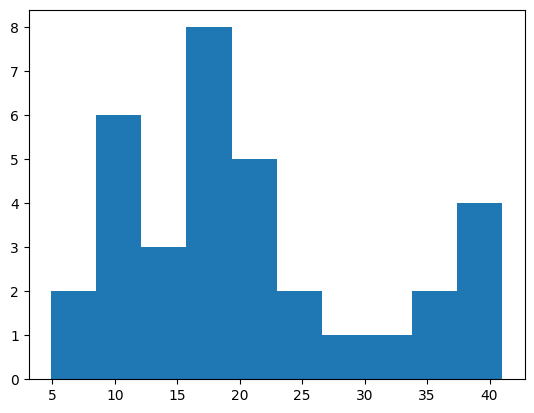

In [ ]:
plt.hist(data_ppg)



---
For my prior, I used a normal distribtion for the mean and a half normal distribution for the standard deviation. A half normal distribution was used for the prior standard deviation because it only contains postive values and more smaller values which prevents the model from having a huge variation.


In [ ]:
#N for normal
with pm.Model() as model_ppgN:
    #this distribution is centered at 20 with a variation of 5
    #as an estimate of the likelihood data
    μ = pm.Normal('μ', mu=20, sigma=5)

    #5 is used because it is suggested by the textbook
    σ = pm.HalfNormal('σ', sigma=5)

    #creates 2 priors of mu and sigma
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_ppg)
    idata_ppgN = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

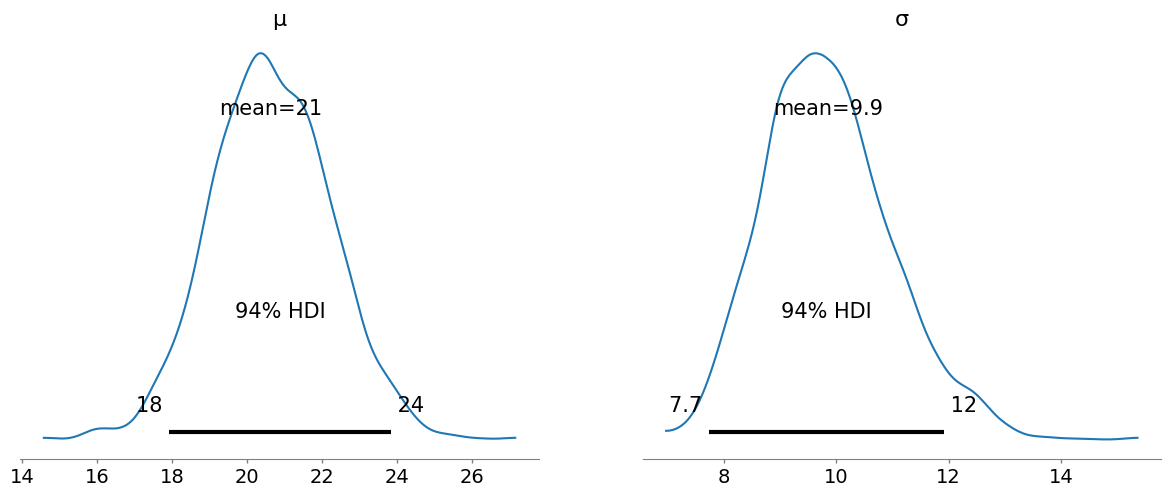

In [ ]:
az.plot_posterior(idata_ppgN)

In [ ]:
pm.sample_posterior_predictive(idata_ppgN, model=model_ppgN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

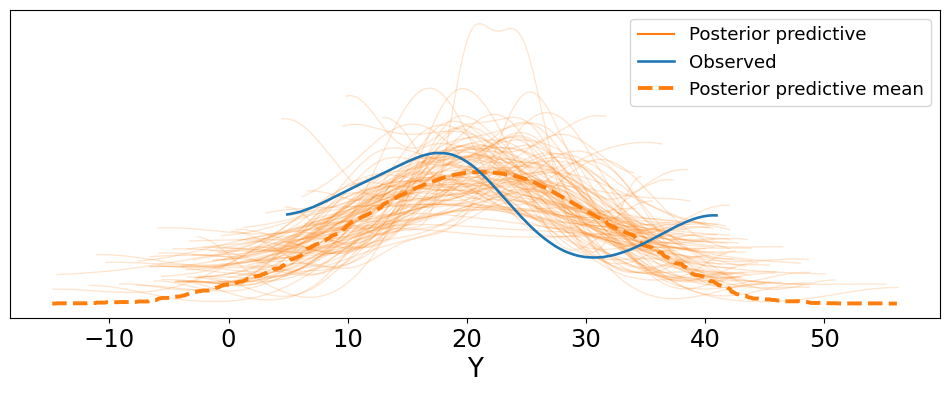

In [ ]:
#Plots the posterior predictive density overlaid with a smoothed version of the data

az.plot_ppc(idata_ppgN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This model did not end up fitting the likelihood becasue the data was much more positively skewed. The normal model used has no skew, so I instead neede to switch to a model that was able to create a postive skew. After looking through different types of distributions, I settled on the Gamma Model because it has a extreme postive skew like I needed.

In [ ]:
#G for Gamma
with pm.Model() as model_ppgG:
    #this distribution is centered at 20 with a variation of 5
    #as an estimate of the likelihood data
    μ = pm.Normal('μ', mu=20, sigma=5)

    #5 is used because it is suggested by the textbook
    σ = pm.HalfNormal('σ', sigma=5)

    #creates 2 priors of mu and sigma
    Y = pm.Gamma('Y', mu = μ, sigma = σ, observed=data_ppg)
    idata_ppgG = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

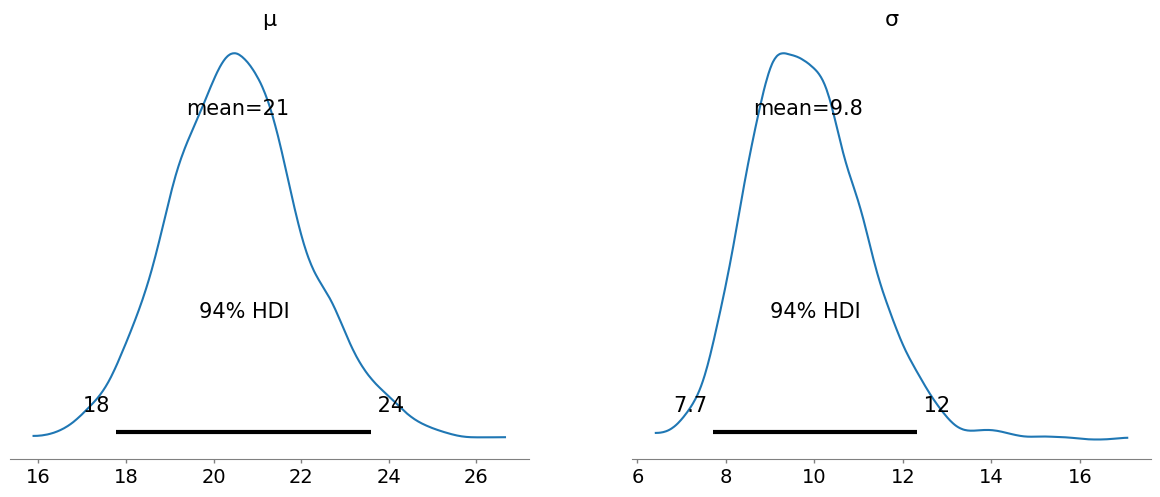

In [ ]:
az.plot_posterior(idata_ppgG)

In [ ]:
pm.sample_posterior_predictive(idata_ppgG, model=model_ppgG, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

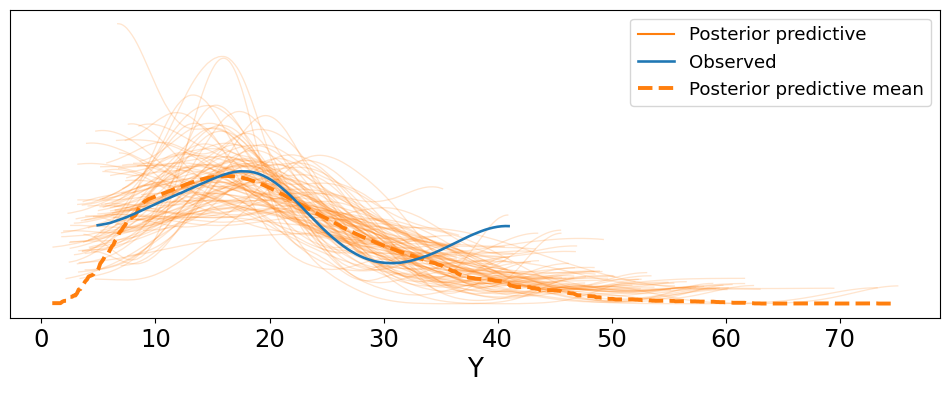

In [ ]:
az.plot_ppc(idata_ppgG, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This gamma model fit the data much better with the skew and will probably be the best we'll get using these models. The tail at the end comes from outliers in the data, but there's nothing we can do with the model to match it exactly.